In [1]:
%matplotlib inline
import sys, os
import numpy

In [2]:
import yt.utilities.math_utils as mu

In [3]:
os.environ['PYOPENGL_PLATFORM'] = 'egl'
import yt
import yt_idv
#import widgyts

In [4]:
# make a 64^3 grid with:
#  dark box outline (0.125)
#  XYZ crosshair of radius 0.5, centered at (0,0,0)
#    with X axis = 0.25, Y axis = 0.45, Z axis = 0.85
#  Small blob at 0.5,0.5,0.5 (box center) = 0.5
#  Small blob at 0.5,0.5,1.0 (middle of +Z face) = 1.0

# Yt expects grids to be indexed as g[ix][iy][iz] (X-major, Z varies fastest)

grid = numpy.zeros( (67,67,67))

grid[13:32, 0:4, 0:4] = 0.25 # X, detached from origin
grid[0:4, 0:32, 0:4] = 0.45  # Y
grid[0:4, 0:4, 0:32] = 0.85  # Z 

for edA in slice(0,2), slice(62,64):
    for edB in slice(0,2), slice(62,64):
        grid[edA, edB, 0:60] = 0.125
        grid[edB, 0:57, edA] = 0.125
        grid[0:54, edA, edB] = 0.125
        
grid[31:34, 31:34, 31:34] = 0.5 # blob in center of cube
grid[28:35, 31:34, 60:64] = 1.0 # bigger blob in middle of +Z face


datad = dict(Density=grid)

In [5]:
with open('gridbox.speck','w') as outf:
    print("#! /usr/bin/env partiview", file=outf)
    print("datavar 0 val", file=outf)
    print("eval color val 1 0", file=outf)
    print("", file=outf)
    for z in range(64):
        for y in range(64):
            for x in range(64):
                if grid[x,y,z] > 0:
                    print("%g %g %g %g" % (x/64., y/64., z/64., grid[z,y,x]), file=outf)

In [6]:
bbox = numpy.array( [ [0,1], [0,1], [0,1] ])
ds = yt.load_uniform_grid( datad, grid.shape, 1.0, bbox=bbox )

yt : [INFO     ] 2022-04-08 08:26:40,791 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-04-08 08:26:40,793 Parameters: domain_dimensions         = [67 67 67]
yt : [INFO     ] 2022-04-08 08:26:40,794 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-08 08:26:40,796 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-04-08 08:26:40,797 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2022-04-08 08:26:41,161 xlim = -0.490000 0.510000
yt : [INFO     ] 2022-04-08 08:26:41,162 ylim = -0.490000 0.510000
yt : [INFO     ] 2022-04-08 08:26:41,163 xlim = -0.490000 0.510000
yt : [INFO     ] 2022-04-08 08:26:41,164 ylim = -0.490000 0.510000
yt : [INFO     ] 2022-04-08 08:26:41,167 Making a fixed resolution buffer of (('stream', 'Density')) 800 by 800



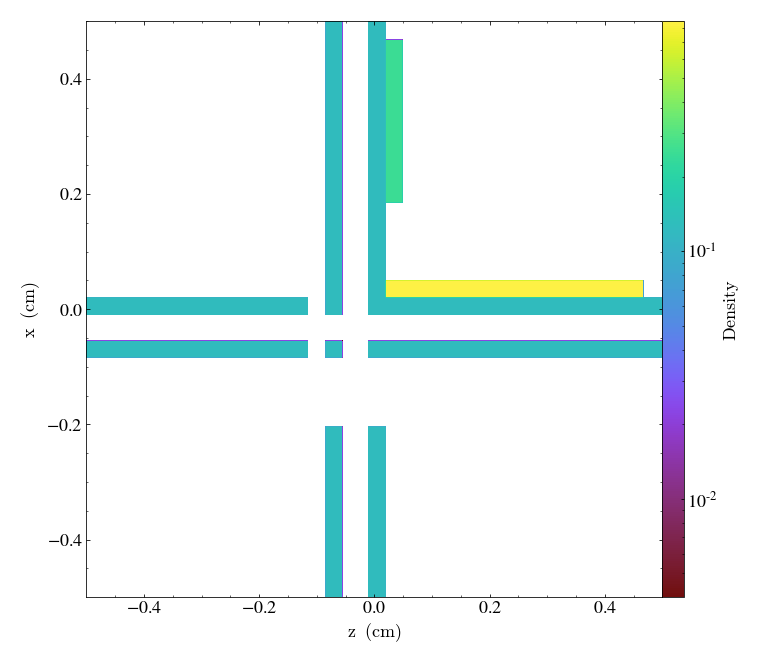

In [7]:
yt.SlicePlot(ds, 'y', 'Density', center=(.01,.01,.01))

yt : [INFO     ] 2022-04-08 08:26:42,261 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-08 08:26:42,261 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-08 08:26:42,262 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-08 08:26:42,263 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-08 08:26:42,265 Making a fixed resolution buffer of (('stream', 'Density')) 800 by 800



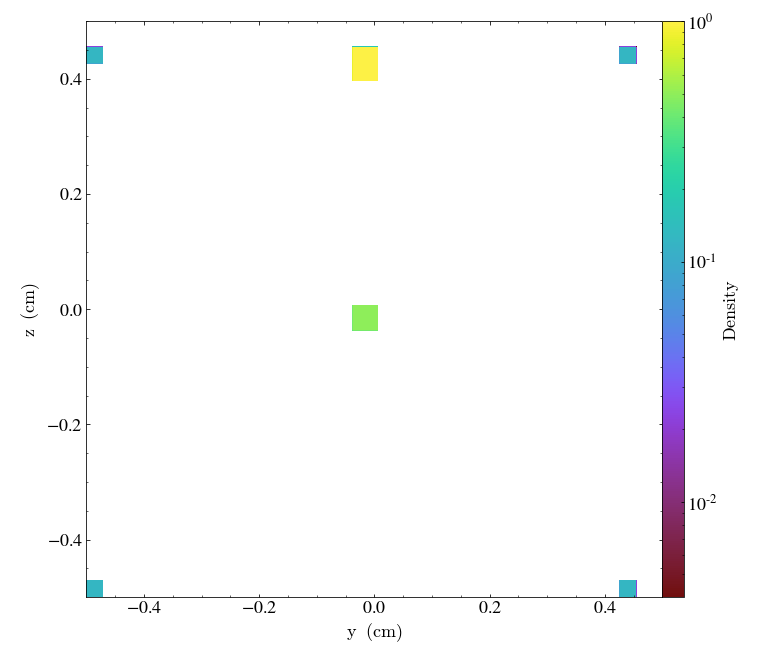

In [8]:
yt.SlicePlot(ds,'x','Density')

In [9]:
rc = yt_idv.render_context(engine='egl', gui=True, width=1200, height=1200)

In [10]:
sg = rc.add_scene(ds, 'Density', no_ghost=True)

In [11]:
print("cmap_log = ", sg.components[0].cmap_log)
sg.components[0].cmap_log = False

cmap_log =  True


In [12]:
im = rc.run()

Computed new cmap values 6.103515625e-05 - 1.0


In [13]:
import matplotlib.pyplot as mp



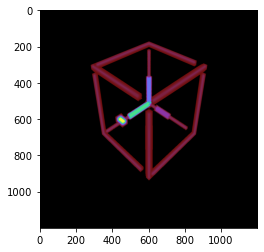

In [14]:
mp.imshow(rc.scene.image)


In [15]:
rc.scene.camera.view_matrix

array([[ 7.0710677e-01, -3.2201111e-08, -7.0710683e-01,  6.1707262e-08],
       [-4.0824831e-01,  8.1649661e-01, -4.0824834e-01,  3.5626705e-08],
       [ 5.7735032e-01,  5.7735032e-01,  5.7735026e-01, -3.4641018e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],
      dtype=float32)

In [16]:
oldcmdata = sg.components[0].colormap.data.copy()


In [17]:
import matplotlib.colors
nicecm = matplotlib.colors.LinearSegmentedColormap.from_list( 'nicetest3', [
        (0, [0,0,0,0]),        # 0=>transparent
        (.125, (.5,.5,.5, .35)), # dim gray cube skeleton
        (.2, (.5,.5,.5,.5)),
        (.25, (1,0,0,.05)),   # red X-axis crosshair
        (.44, (0,1,0,.15)),   # green Y
        (.84, (0,0,1,.25)),   # blue Z
        (1.0, (1,1,1,.5))])

matplotlib.pyplot.register_cmap( 'nicetest3', nicecm)

In [18]:
#sg.components[0].colormap.data[:,3] = numpy.clip( numpy.linspace(0,8, 256), 0, 1)
#sg.components[0].colormap.data[:,0] = 0.5
sg.components[0].colormap.colormap_name = 'nicetest3'

im = rc.run()


In [19]:
# Construct a new matrix using yt math_utils
# Viewpoint is on the midplane of the box, with the X axis pointed mostly towards us.
viewpos = [-1.5,-1,-1.5]
T = mu.get_lookat_matrix(viewpos, [0,0,0], [0,1,0])
rc.scene.camera.view_matrix = T
rc.scene.camera.position = viewpos
im = rc.run()

In [38]:
rc.add_image()
##  Puzzled by this image.
## Shouldn't we see the near-edge gray cube skeleton in front of the red/green/blue crosshair?
## Shouldn't we see the far-edge cube skeleton behind that low-opacity crosshair?
## How is opacity working?

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xb0\x00\x00\x04\xb0\x08\x06\x00\x00\x00\xeb!\xb3…

In [21]:
rc.scene.camera.view_matrix

array([[-7.0710677e-01,  0.0000000e+00,  7.0710677e-01, -0.0000000e+00],
       [-3.0151135e-01,  9.0453404e-01, -3.0151135e-01,  1.1102230e-16],
       [-6.3960212e-01, -4.2640144e-01, -6.3960212e-01, -2.3452079e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],
      dtype=float32)

In [22]:
import tfm
# AVL transform library, including translating partiview/virdir camera matrices

In [23]:
# making guesses as to how to turn this into partiview/virtual-director form, which uses a camera-to-world style
# The view matrix looks like it might be the inverse transpose of an opengl camera-to-world matrix, in the sense
# p_cam * Tc2w = p_world
def p(vec):
    return " ".join("%g" % (0 if abs(v)<1e-7 else v) for v in vec);

print("jump", p(tfm.tfm2vd( tfm.tmul(tfm.tfm('z',0),numpy.linalg.inv(T.transpose())))))


jump -1.5 -1 -1.5 25.2394 -135 0


In [24]:
yt.__file__

'/fe0/gd/home/src/sci/yt/yt/__init__.py'

In [25]:
sc = yt.create_scene(ds, lens_type='perspective', field='Density')
source = sc[0]
source.set_field('Density')
source.set_log(False)


<Volume Source>:YTRegion (UniformGridData): , center=[0.5 0.5 0.5] cm cm, left_edge=[0. 0. 0.] cm cm, right_edge=[1. 1. 1.] cm cm transfer_function:None

In [26]:
bounds = (0, 1)
tf = yt.ColorTransferFunction(bounds)
tf.add_gaussian( 0.25, width=.01, height=[1,0,0,1])
tf.add_gaussian( 0.45, width=.01, height=[0,1,0,1])
tf.add_gaussian( 0.85, width=.01, height=[0,0,1,1])
tf.add_gaussian( 0.5, width=.01, height=[.5,.5,.5,1])
tf.add_gaussian( 1.0, width=.01, height=[0,1,.6,.5])


In [27]:
sc.camera.unit_vectors

unyt_array([[ 0.        ,  0.70710678, -0.70710678],
            [ 0.81649658, -0.40824829, -0.40824829],
            [-0.57735027, -0.57735027, -0.57735027]], '(dimensionless)')

In [28]:
sc.camera.set_position([0,0,3])

In [29]:
import matplotlib.pyplot as mp

In [30]:
# sc.camera.normal_vector # sc.camera.normal_vector = [0,0,-1]
sc.camera.focus=[0,0,0]
sc.camera.unit_vectors

unyt_array([[ 0.56652882,  0.82404192,  0.        ],
            [ 0.82404192, -0.56652882,  0.        ],
            [ 0.        ,  0.        , -1.        ]], '(dimensionless)')

yt : [INFO     ] 2022-04-08 08:26:44,665 Rendering scene (Can take a while).
yt : [INFO     ] 2022-04-08 08:26:44,668 Creating volume
yt : [INFO     ] 2022-04-08 08:26:44,705 Creating transfer function
yt : [INFO     ] 2022-04-08 08:26:44,706 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.


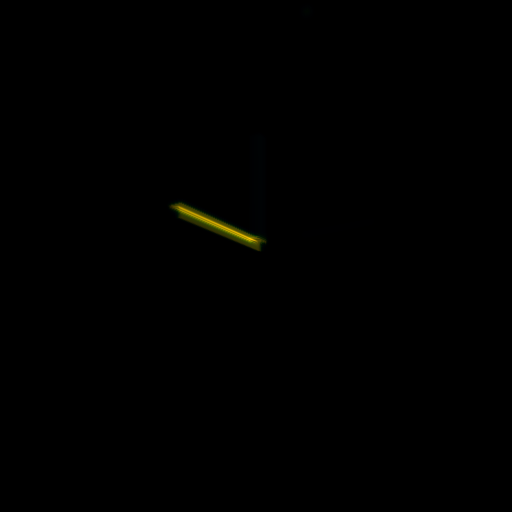

In [31]:
sc.camera.set_position([1,-.5,1.5], north_vector=[0,1,0]); sc.render(); sc

In [32]:
sc.camera.lens

<Lens Object>:
	lens_type:perspective
	viewpoint:[-0.40089186  0.20044593 -0.60133779] unitary unitary

In [33]:
sc.camera.lens.viewpoint

unyt_array([-0.40089186,  0.20044593, -0.60133779], 'unitary')

In [34]:
sc.camera.lens.set_viewpoint( [1,1,.5])

yt : [INFO     ] 2022-04-08 08:26:47,712 Rendering scene (Can take a while).


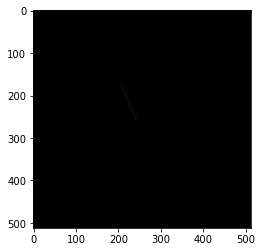

In [35]:
mp.imshow(sc.render())

In [36]:
import yt.visualization.volume_rendering as vr

In [37]:
vs = vr.render_source.VolumeSource( ds, field='Density')

TypeError: Can't instantiate abstract class VolumeSource with abstract methods _get_volume, render

In [ ]:
vs

In [ ]:
yt.__version__